In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
df  = pd.read_csv('/content/drive/My Drive/fer2013.csv')

In [3]:
width, height = 48,48
num_labels = 7

In [4]:
X_train,y_train,X_test,y_test,X_fin,y_fin = [],[],[],[],[],[]

In [5]:
#get features
for i,row in df.iterrows():
  val = row['pixels'].split(' ')

  if 'Training' in row['Usage']:
    X_train.append(np.array(val,'float32'))
    y_train.append(row['emotion'])
  elif 'PublicTest' in row['Usage']:
    X_test.append(np.array(val,'float32'))
    y_test.append(row['emotion'])
  elif 'PrivateTest' in row['Usage']:
    X_fin.append(np.array(val,'float32'))
    y_fin.append(row['emotion'])


print("number of example for train:"+str(len(X_train)))
print("number of example for test:"+str(len(X_test)))
print("number of example for final:"+str(len(X_fin)))
print("number of labels:"+str(len(y_train)))


number of example for train:28709
number of example for test:3589
number of example for final:3589
number of labels:28709


In [6]:
X_train = np.array(X_train,'float32')
X_test = np.array(X_test,'float32')
X_fin = np.array(X_fin,'float32')

y_train = np.array(y_train,'float32')
y_test = np.array(y_test,'float32')
y_fin = np.array(y_fin,'float32')

In [7]:
#normalize
X_train  -= np.mean(X_train,axis=0)
X_train/= np.std(X_train,axis=0)

X_test -= np.mean(X_test,axis=0)
X_test/= np.std(X_test,axis=0)

X_fin -= np.mean(X_fin,axis=0)
X_fin/= np.std(X_fin,axis=0)

In [8]:
X_train = X_train.reshape(X_train.shape[0],width,height,1)
X_test = X_test.reshape(X_test.shape[0],width,height,1)
X_fin = X_fin.reshape(X_fin.shape[0],width,height,1)

y_train = np_utils.to_categorical(y_train,num_classes=7)
y_test = np_utils.to_categorical(y_test,num_classes=7)
y_fin = np_utils.to_categorical(y_fin,num_classes=7)


print(X_train.shape)
print(X_test.shape)
print(X_fin.shape)

print(y_train.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
(28709, 7)


In [12]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 128)      

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [14]:
his = model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 71s 2ms/step - loss: 1.9964 - accuracy: 0.2138 - val_loss: 1.8302 - val_accuracy: 0.2494
Epoch 2/100
28709/28709 [==============================] - 69s 2ms/step - loss: 1.8190 - accuracy: 0.2550 - val_loss: 1.7223 - val_accuracy: 0.2956
Epoch 3/100
28709/28709 [==============================] - 69s 2ms/step - loss: 1.7375 - accuracy: 0.2950 - val_loss: 1.6314 - val_accuracy: 0.3165
Epoch 4/100
28709/28709 [==============================] - 69s 2ms/step - loss: 1.6149 - accuracy: 0.3551 - val_loss: 1.4779 - val_accuracy: 0.4177
Epoch 5/100
28709/28709 [==============================] - 69s 2ms/step - loss: 1.5123 - accuracy: 0.4083 - val_loss: 1.4003 - val_accuracy: 0.4411
Epoch 6/100
28709/28709 [==============================] - 69s 2ms/step - loss: 1.4625 - accuracy: 0.4290 - val_loss: 1.3710 - val_accuracy: 0.4706
Epoch 7/100
28709/28709 [==============================] - 69s 

In [18]:
model = load_model('/content/drive/My Drive/fer2.h5')
#Epoch 30/30
#28709/28709 [==============================] - 457s 16ms/step - loss: 1.1644 - accuracy: 0.5565 - val_loss: 1.1439 - val_accuracy: 0.5653

In [15]:
model.save('/content/drive/My Drive/fer3.h5')

In [16]:
model.save_weights('/content/drive/My Drive/fer3_weights.h5')

In [21]:
fer_json = model.to_json()
with open("/content/drive/My Drive/fer.json", "w") as json_file:
    json_file.write(fer_json)

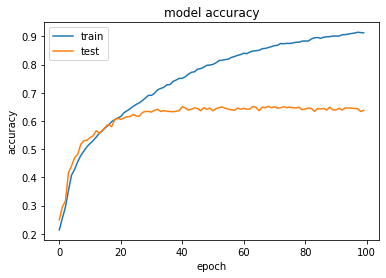

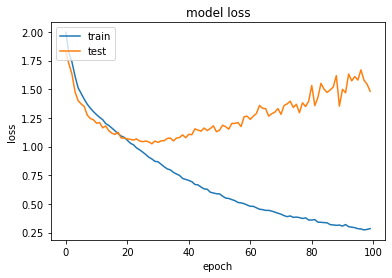

In [18]:
import matplotlib.pyplot as plt

plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [40]:
import cv2
from keras.preprocessing import image

img = cv2.imread('/content/drive/My Drive/kaggle/train_dataset/real/real_00122.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray,(48,48))
img_pixels = image.img_to_array(img_gray)
img_pixels = np.expand_dims(img_pixels,axis=0)
img_pixels/=255

predict = model.predict(img_pixels)
max_index = np.argmax(predict[0])

emotions = ('angry','disguist','fear','happy','sad','surprise','neutral')

emotion_predict = emotions[max_index]
print(emotion_predict)

neutral


In [20]:
model.evaluate(X_fin,y_fin)

3589/3589 [==============================] - 3s 930us/step


[1.3533185477640743, 0.661744236946106]